# Проект по курсу "Принятие решений в бизнесе на основе данных"

### Оглавление

1. [Описание проекта](#step1)
2. [Часть 1. Приоритизация гипотез](#step2)
3. [Часть 2. Анализ A/B-теста](#step3)

## Описание данных
### Данные для первой части

Файл /datasets/hypothesis.csv.
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 

Чем больше значение Efforts, тем дороже проверка гипотезы.

### Данные для второй части
Файл */datasets/orders.csv*. 
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл */datasets/visitors.csv*.
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Описание проекта <a id="step1"></a>

Имеем данные одного из интернет-магазинов. Вместе с отделом маркетинга был подготовилен список гипотез для увеличения выручки.
Задача: приоритезировать гипотезы, запустить A/B-тест и проанализировать результаты.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import datetime as dt

## Часть 1. Приоритизация гипотез <a id="step2"></a>

#### Задачи.
- Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] /
                    hypothesis['Efforts']).round(2)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Самыми приоритетными являются гипотезы: 
- акция на день рождения;
- два новых канала привлечения ;
- добавить форму подписки на основные страницы.

- Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
hypothesis['RICE'] = (hypothesis['Reach'] * 
                      hypothesis['Impact'] * 
                      hypothesis['Confidence']/
                      hypothesis['Efforts'])
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


- Низкий приоритет сохранился для четырех гипотез, при применении RICE они незначительно изменили свой порядок.
- Что же касается гипотез с высоким приоритетом, то они очень разнятся в зависимости от применяемого метода - самая приоритетная гипотеза по ICE сместилась ровно на середину при  методе RICE, а самой приоритетной по RICE стала третья гипотеза по ICE.
- В каждом случае нужно инвидиуально оценивать, насколько нам важен параметр охвата, стоит ли его включать в оценку.

В итоге стоит как минимум рассмотреть гипотезу о "добавлении формы подписки на основные страницы", так как она сильно выбивается вперед при методе RICE. Если же хватает ресурсов, то можно взять на проверку также гипотезу о "добавлении двух новых каналов привлечения трафика", так как она имеем средний показатель по RICE, но высоко стоит по ICE.

## Часть 2. Анализ A/B-теста <a id="step3"></a>

1. Построим график кумулятивной выручки по группам.

In [34]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
display(orders.sort_values(by='date'))
display(visitors.sort_values(by='date'))
display(orders.info())
display(visitors.info())

,transactionId,visitorId,date,revenue,group
168,2065527789,1581167209,2019-08-01,1780,A
73,1295850747,2947100995,2019-08-01,29499,A
72,477940151,1422773200,2019-08-01,700,A
71,3679129301,8300375,2019-08-01,10510,B
70,3574407166,2328378067,2019-08-01,8999,B
...,...,...,...,...,...
1021,969750843,4120364173,2019-08-31,15500,B
1022,2411823395,3788724847,2019-08-31,2610,A
1023,2886170101,930758570,2019-08-31,6674,B
995,3465107905,2075883701,2019-08-31,2610,B


,date,group,visitors
0,2019-08-01,A,719
31,2019-08-01,B,713
1,2019-08-02,A,619
32,2019-08-02,B,581
2,2019-08-03,A,507
...,...,...,...
28,2019-08-29,A,577
60,2019-08-30,B,490
29,2019-08-30,A,490
30,2019-08-31,A,699


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [6]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [42]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())
display(orders[orders['visitorId'].duplicated()].sort_values(by='visitorId').head(40))

0

0

,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
1102,1941707234,199603092,2019-08-12,6438,A
134,62794304,199603092,2019-08-22,6976,A
1013,83566152,232979603,2019-08-31,60,A
590,3702128013,237748145,2019-08-20,1290,A
716,972407388,237748145,2019-08-27,470,A
41,2594268419,237748145,2019-08-15,1090,A
1097,3357467820,237748145,2019-08-12,340,A


Вывод:
1. У нас есть 1197 логов с заказами в нашем магазине и 62 лога с посещениями сайта магазина за август 2019 года.
2. В данных нет пропусков и дубликатов.
3. Мы изменили тип данных дат в обоих датафреймах с object на datetime64[ns].
4. Также в результатах А/B-теста имеем несколько пользователей, которые попали в разные группы.

In [8]:
# Создадим массив уникальных пар значений дат и групп теста.

dateGroups = orders[['date', 'group']].drop_duplicates()

# Теперь нужно собрать агрегированные кумулятивные по дням данные о заказах.

ordersAggregated = dateGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [9]:
#Теперь получим агрегированные кумулятивные по дня данные о посетителях магазина.

visitorsAggregated = dateGroups.apply(lambda x: 
                    visitors[np.logical_and(visitors['date'] <= x['date'], 
                                            visitors['group'] == x['group'])].agg({
                    'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [10]:
# Объединяем данные из двух таблиц и переименовываем столбцы.

cumuData = ordersAggregated.merge(visitorsAggregated, 
                                        left_on=['date', 'group'], 
                                        right_on=['date', 'group'])
cumuData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumuData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


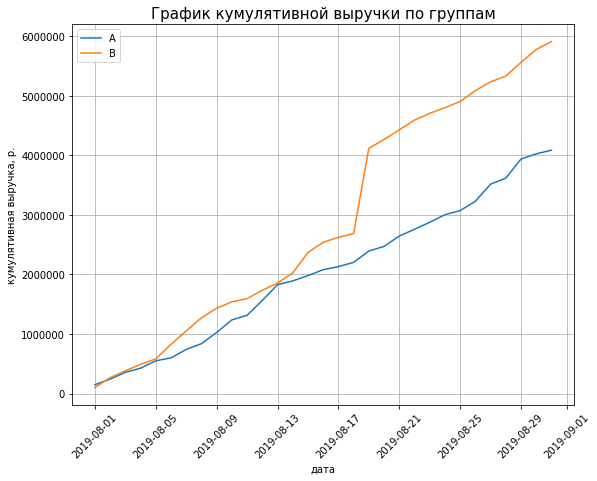

In [53]:
cumRevenueA = cumuData[cumuData['group'] == 'A'][['date', 'revenue', 'orders']]
cumRevenueB = cumuData[cumuData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(9, 7))
plt.plot(cumRevenueA['date'], cumRevenueA['revenue'], label='A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам', size=15)
plt.xlabel('дата')
plt.ylabel('кумулятивная выручка, р.')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

Выручка почти равномерно учеличивается в течение теста. Однако графики имеют точку, в которой они резко растут. Лучше это видно на графике выручки группы В. Это свидетельствует о выбросах либо в количестве заказов, либо в стоимости заказов.

2. Построим график кумулятивного среднего чека по группам.

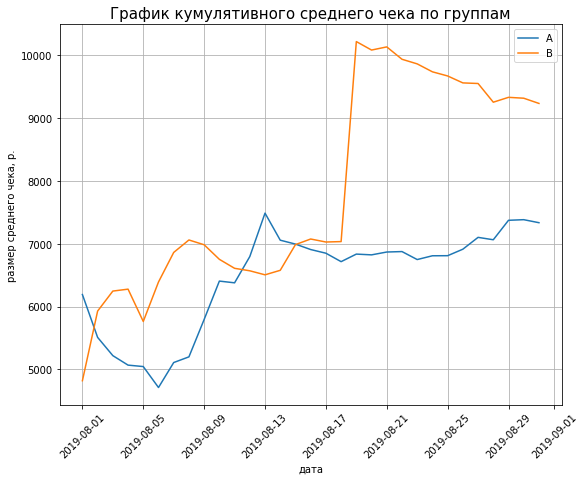

In [52]:
plt.figure(figsize=(9, 7))
plt.plot(cumRevenueA['date'], cumRevenueA['revenue']/cumRevenueA['orders'], label='A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue']/cumRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам', size=15)
plt.xlabel('дата')
plt.ylabel('размер среднего чека, р.')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

Графики средних чеков обеих групп в начале имеют большое количество всплесков, равномерными графики становятся к концу теста, при этом средний чек группы В стбильно уменьшается. В группу В во второй половине теста попали крупные заказы - видим резкий всплеск на графике.

 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

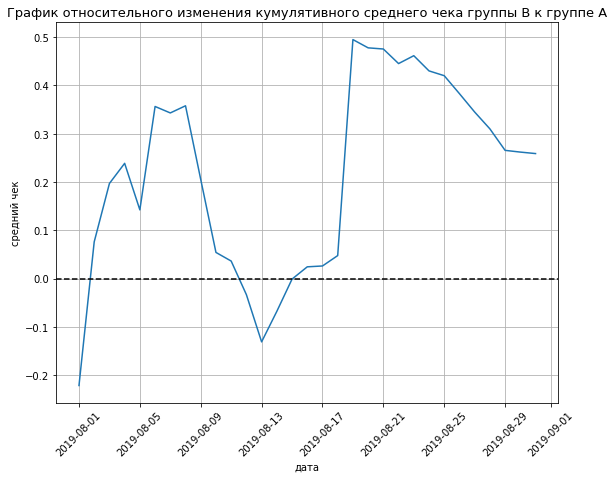

In [59]:
# Сначала собираем данные в одной таблице.

mergedCumRevenue = cumRevenueA.merge(cumRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   suffixes=['A', 'B'])

# Теперь построим график

plt.figure(figsize=(9, 7))
plt.plot(mergedCumRevenue['date'], 
         (mergedCumRevenue['revenueB']/mergedCumRevenue['ordersB'])/
         (mergedCumRevenue['revenueA']/mergedCumRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', size=13)
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.xticks(rotation=45)
plt.grid(True)

# Добавим горизонтальную ось Х на отметке y=0

plt.axhline(y=0, color='black', linestyle='--')

Видим на графике несколько крупных всплесков, которые свидетельствуют о выбросах.

4. Построим график кумулятивной конверсии по группам.

In [14]:
cumuData.sort_values(by='date')
cumuData.describe()

,orders,buyers,revenue,visitors
count,62.000000,62.000000,6.200000e+01,62.000000
mean,317.661290,291.903226,2.464491e+06,9883.306452
std,172.828157,157.498031,1.659118e+06,5378.074717
min,21.000000,20.000000,1.012170e+05,713.000000
25%,177.750000,162.000000,1.096278e+06,5437.500000
50%,319.500000,293.500000,2.165968e+06,10030.000000
75%,459.250000,421.000000,3.856338e+06,14259.000000
max,640.000000,586.000000,5.907760e+06,18916.000000


['2019-07-31', '2019-09-01', 0.02, 0.04]

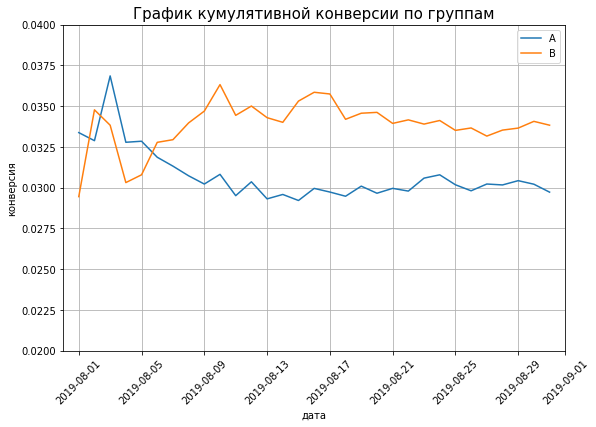

In [57]:
# Посчитаем кумулятивную по дням конверсию 

cumuData['conversion'] = cumuData['orders']/cumuData['visitors']

cumDataA = cumuData[cumuData['group'] == 'A']
cumDataB = cumuData[cumuData['group'] == 'B']

plt.figure(figsize=(9, 6))
plt.plot(cumDataA['date'], cumDataA['conversion'], label='A')
plt.plot(cumDataB['date'], cumDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам', size=15)
plt.xlabel('дата')
plt.ylabel('конверсия')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# зададим масштаб осей
plt.axis(["2019-07-31", "2019-09-01", 0.02, 0.04])

In [16]:
cumuData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


5. Построим график относительного изменения кумулятивной конверсии группы B к группе A.

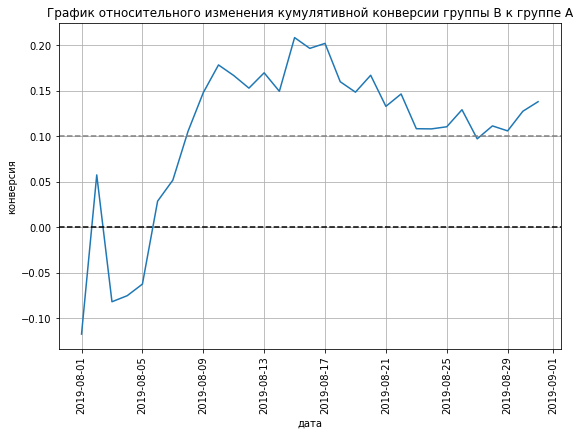

In [58]:
mergedCumConversions = cumDataA[['date', 'conversion']].merge(cumDataB[['date', 'conversion']], 
                                                              left_on='date', 
                                                              right_on='date', 
                                                              how='left', 
                                                              suffixes=['A', 'B'])

plt.figure(figsize=(9, 6))
plt.plot(mergedCumConversions['date'], 
         mergedCumConversions['conversionB']/mergedCumConversions['conversionA']-1, )
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('дата')
plt.ylabel('конверсия')
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.grid(True)


Конверсия группы В начала лидировать почти с самого начала теста, но с середины теста она пошли вниз.

6. Построим точечный график количества заказов по пользователям.

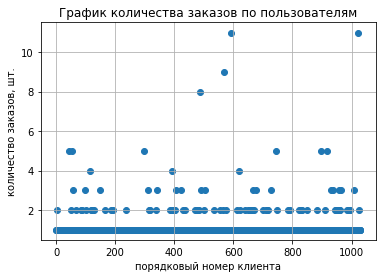

In [61]:
orders_per_visitor = orders.groupby('visitorId').agg({'transactionId':'count', 'revenue':'sum'}).reset_index()
orders_per_visitor.columns = ['visitorId', 'n_orders', 'revenue']
x_values = pd.Series(range(0, len(orders_per_visitor['n_orders'])))
plt.scatter(x_values, orders_per_visitor['n_orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('порядковый номер клиента')
plt.ylabel('количество заказов, шт.')
plt.grid(True)

На графике видим, что у нас есть несколько клиентов, которые делат большое количество заказов (три и больше заказов), однако их очень мало.

7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [19]:
display(np.percentile(orders_per_visitor['n_orders'], [90, 95, 98, 99]))

array([1., 2., 3., 4.])

Не более 5% пользователей оформляли больше 2 заказов. За нижнюю границу числа заказов на пользователя возьмем 3, все, что больше трех, будет считаться аномальным значением.

8. Построим точечный график стоимостей заказов.

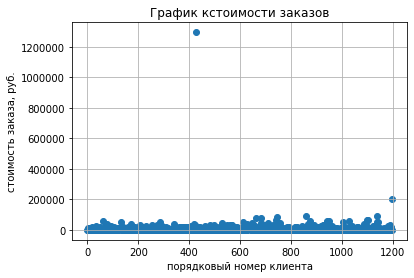

In [63]:
x_values_r = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values_r, orders['revenue'])
plt.title('График кстоимости заказов')
plt.xlabel('порядковый номер клиента')
plt.ylabel('стоимость заказа, руб.')
plt.grid(True)

На графике видим пару дорогих заказов.

9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [21]:
display(orders['revenue'].reset_index().describe(percentiles=[0.9, 0.95, 0.99]).T)

,count,mean,std,min,50%,90%,95%,99%,max
index,1197.0,598.000000,345.688444,0.0,598.0,1076.4,1136.2,1184.04,1196.0
revenue,1197.0,8348.005848,39191.131774,50.0,2978.0,18168.0,28000.0,58233.20,1294500.0


В этом случае мы видим, что не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. За нижнюю границу стоимости заказов возьмем 30000 рублей.

10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [22]:
# Найдем для каждой группы:
# - количество пользователей в выбранную дату
# - количество пользователей до выбранной даты включительно
# - количество заказов в выбранную дату
# - суммарное число заказов до выбранной даты включительно
# - суммарная выручка в выбранную дату
# - суммарная выручка до выбранной даты включительно

visitorsADaily = visitors[visitors['group'] =='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACum = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] == x['date']]
                                            .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
visitorsACum.columns = ['date', 'visitorsCummulativeA']


visitorsBDaily = visitors[visitors['group'] =='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCum = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] == x['date']].
                                            agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
visitorsBCum.columns = ['date', 'visitorsCummulativeB']


ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].
                groupby('date', as_index=False).
                agg({'transactionId':pd.Series.nunique, 'revenue':'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACum = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <=x['date']].
                                agg({'date':'max', 
                                     'ordersPerDateA':'sum', 
                                     'revenuePerDateA':'sum'}), axis=1).sort_values(by=['date'])
ordersACum.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']


ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].
                groupby('date', as_index=False).
                agg({'transactionId':pd.Series.nunique, 'revenue':'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCum = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].
                                agg({'date':'max', 
                                     'ordersPerDateB':'sum', 
                                     'revenuePerDateB':'sum'}), axis=1).sort_values(by=['date'])
ordersBCum.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [23]:
# Соединим таблицы в одну общую

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
.merge(ordersACum, left_on='date', right_on='date', how='left')\
.merge(ordersBCum, left_on='date', right_on='date', how='left')\
.merge(visitorsADaily, left_on='date', right_on='date', how='left')\
.merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
.merge(visitorsACum, left_on='date', right_on='date', how='left')\
.merge(visitorsBCum, left_on='date', right_on='date', how='left')

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,619,581
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,507,509
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,717,770
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,756,707


In [24]:
display(visitors.head())
display(orders.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [25]:
# найдем пользователей в каждой группе, которые совершили хотя бы 1 заказ 
# и укажем число совершенных заказов
ordersByUsersA = (orders[orders['group'] == 'A'].
                  groupby('visitorId', as_index=False).
                  agg({'transactionId':pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].
                  groupby('visitorId', as_index=False).
                  agg({'transactionId':pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']

In [26]:
sampleA = pd.concat([ordersByUsersA['orders'], 
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
                                                   len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], 
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
                                                   len(ordersByUsersB['orders'])), name='orders')], axis=0)

In [27]:
# Посчитаем статистическую значимость различий в конверсии.
# Выведем относительный прирост конверсии группы В.

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


<b>Вывод:</b> в "сырых" данных мы имеем некоторые различия в конверсиях между группами А и В.

p-value = 0.008, это меньше 0.05, поэтому есть все основания ответгнуть нулевую гипотезу, которая гласит, что статистически значимых различий по конверсиям между группами нет. 

11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [28]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], 
                                       orders[orders['group'] == 'B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group'] == 'A']['revenue'].mean()/
                       orders[orders['group'] == 'B']['revenue'].mean()-1))

0.365
-0.206


P-value=0.365, а это значительно больше 0.05, значит, у нас недостаточно оснований отвегать нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет.

12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Помним, что за аномальных пользователей мы приняли тех, кто совершил от 4 заказов или кто совершил заказал на сумму дороже, чем 30000. Таким образом, уберется 2% пользователей с наибольшим числом заказов и от 1 до 5% пользователей с дорогими заказами.

In [29]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, 
                            usersWithExpensiveOrders], axis=0).
                 drop_duplicates().sort_values())
display(abnormalUsers.head())
display(abnormalUsers.shape)

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
dtype: int64

(53,)

Мы имеем 53 аномальных .пользователя, которые делали больше 4 заказов либо заказ более, чем на 30000

In [30]:
sampleAfiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], 
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()-len(ordersByUsersA['orders'])), 
                                       name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], 
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                                       name='orders')], axis=0)

In [31]:
print('"Очищенные" данные:')
print("{0:.3f}".format(st.mannwhitneyu(sampleAfiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAfiltered.mean()-1))

"Очищенные" данные:
0.009
0.144


"Сырые" данные:
- P-value: 0.008
- Относительное различие конверсий: 0.138

Результаты по конверсии остались почти неизменны.

13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [32]:
print('"Очищенные" данные:')
print("{0:.3}".format(st.mannwhitneyu(orders[np.logical_and(
    orders['group'] == 'A', 
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
                    orders[np.logical_and(orders['group'] == 'B', 
                                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(
    orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
                orders[np.logical_and(orders['group'] == 'A', 
                                      np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))

"Очищенные" данные:
0.49
-0.017


"Сырые" данные:
- P-value: 0.365
- Относительное различие средних чеков: -0.206

Значение p-value немного увеличилось, поэтому по-прежнему причин отвергать нулевую гипотезу о равенстве средних чеков двух групп нет, однако разница между сегментами сократилась с 20% до 1,7%. 

14. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Вывод:

##### Приоретизация гипотез:
Разные фреймворки для приоретизации гипотез показали разные резльзультаты.

В первую очередь стоит рассмотреть гипотезу о "добавлении формы подписки на основные страницы", так как она имеет высокий показатель при методе RICE. Если хватает ресурсов, то можно взять на проверку также гипотезу о "добавлении двух новых каналов привлечения трафика", так как она имеем средний показатель по RICE, но высоко стоит по ICE.

##### Анализ данных:
Касательно датафреймов orders и visitors:
1. У нас есть 1197 логов с заказами в нашем магазине и 62 лога с посещениями сайта магазина за август 2019 года.
2. В данных нет пропусков и дубликатов.
3. Мы изменили тип данных дат в обоих датафреймах с object на datetime64[ns].
4. Также в датафрейме с заказами имеем несколько пользователей, которые попали в обе тестируемые группы.

##### Анализ результатов А/Б-теста:
- достигнуто статистически значимое различие по конверсии между группами как по "сырым", так и по "очищенным" данным;
- нет статистически значимого различия по среднему чеку между группами ни по "сырым" данным, ни по данным после фильтрации;
- график различия конверсий говорит о том, что результаты группы В хуже группы А;
- график различия средних чеков сильно колеблется, сделать из него конкретные выводя тяжело.

Тест следует остановить, так как при имеющихся данных вероятность, что сегмент В лучше сегмента А, очень мала.